***
# HCI 2021 Final Exam
*Matthew Kenworthy // Leiden Observatory*

***

This is the final exam for the HCI 2021 course. You have seven days to submit your completed exam. 

The exam is FOR YOU ONLY. Do not work with anyone else on this exam.

You may reuse code from your own Notebooks from the HCI course.

Do NOT import any additional Python modules. 

<div class="alert alert-block alert-danger">
<b>DEADLINE FOR SUBMISSION OF THE EXAM IS 23:59 on SUNDAY 23 MAY</b>
</div>

Please replace ``YOUR_NAME`` with your name and upload the Notebook through Brightspace before the deadline.

Answer the questions fully in English in a cell after the question. There are **10 points in total** on this exam.

All graphs and plot axes **MUST** be labelled with quantities and units where appropriate. You will lose points if we cannot determine what your plot is showing.

DO NOT discuss the exam with other students from the HCI course. If you have questions about the exam, please send us a message through Brightspace.

The notebook **must compile cleanly** (``Cell => All Output=> Clear`` and then ``Cell => Run All`` must produce all your graphs and plots and images without an error) and should contain all subroutines required for data reduction.

<div class="alert alert-block alert-danger">
<b>If the notebook does NOT complile cleanly, you will LOSE MARKS on this final exam.</b>
</div>

The data for the exam is of a nearby star with several candidate companions imaged near it. 

The goal of the exam is to find the candidate companion closest to the star.

There is a data cube called ``hci_exam_2021.fits`` and an associated file called ``parang_nc2.dat`` that contains angles in degrees read out from the telescope derotator.
  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

import matplotlib as mpl
mpl.rc('image', interpolation='nearest', origin='lower')

from astropy.io import ascii

def wfits(im, fname):
    """wfits - write im to file fname, automatically overwriting any old file"""
    from astropy.io import fits
    hea = fits.PrimaryHDU(im)
    hea.writeto(fname, overwrite=True)
    
    
# read in the data cube
im, he = fits.getdata('hci_exam_2021.fits', header=True)

# read in the rotation angles
t = ascii.read('parang_nc2.dat',format='no_header')
rot = (t['col1']).data


---
<span style="  font-size:2em; color: SteelBlue;">Question 1</span> <span style="  font-size:1em; color: SteelBlue;">
(1 point): </span><br>
**What type of diversity is being used in this data?**

---

In [2]:
print("Number of rotaton angles in rotation file ::    {}".format(rot.shape[0]))
print("Number of images                          ::    {}".format(im.shape[0]))
print("Pixel size of the images                  ::    {} x {}".format(im.shape[1],im.shape[2]))

Number of rotaton angles in rotation file ::    64
Number of images                          ::    64
Pixel size of the images                  ::    181 x 181


In [3]:
# Q1 answer here
print("Angular diversity is being used in the data.")

Angular diversity is being used in the data.


The camera uses a focal plane coronagraph, which makes the data unreliable in the middle of the image. To be safe, you must ignore the central PSF core and the first bright ring surrounding the core.

---
<span style="  font-size:2em; color: SteelBlue;">Question 2</span> <span style="  font-size:1em; color: SteelBlue;">
(1 point): </span>

1. **Choose one of the images from the data cube, and plot out the values of one row that passes through the centre of the PSF. Label the axes as <code>pixel position </code> and <code>flux [counts]</code>**
2. **By visual inspection, look at one of the images from the image cube and estimate the radius in pixels which should be ignored in the data processing.**
3. **Choose one of the images in the data cube, cut out a 41 by 41 pixel box centered on the star, and draw a red circle centered on the star. This circle should have a radius that encloses most of the flux of the core and the first diffraction ring.**


<div class="alert alert-block alert-info">
<b>NOTE:</b> The data within this circle should be ignored in all subsequent data reduction </div>

---

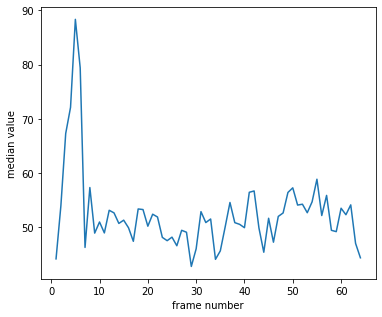

In [4]:
# data preprocessing

median_val = np.median(im,axis=(1,2))
# subtract the median value off of each frame
im = im - median_val[:,np.newaxis,np.newaxis]
frames = np.arange(1,len(median_val)+1,1)
# plot the median value as a function of frame number
# after subtracting off of the median values
fig, ax = plt.subplots(1, 1,figsize=(6,5))
ax.plot(frames,median_val)
ax.set_xlabel('frame number')
ax.set_ylabel('median value')
plt.show()

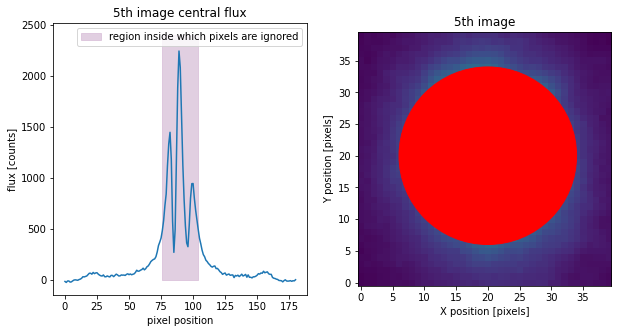

The left figure shows the row of fluxes that passes through the centre of the PSF, as a function of pixel position, of the 5th image in the image cube. The right figure shows a box cut with 41*41 image size, of the same image, with the central PSF covered by a red circle.
By visual inspection we should cut out a circle with radius = 14 in pixels when processing the data.


In [5]:
# Q2 answer here

#choose to plot the 5th image in the image cube
im_ind = 4
# getting the image centre
im_cent = int((im.shape[1]-1)/2)
# get the radius to cut out the central PSF by eye
im_rad = 14

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(im[im_ind,im_cent,:])
ax[0].fill_between(np.linspace(im_cent-im_rad,im_cent+im_rad,100),0,2400,alpha=.75,color='thistle',label='region inside which pixels are ignored')
ax[0].set_xlabel('pixel position')
ax[0].set_ylabel('flux [counts]')
ax[0].set_title('5th image central flux')
ax[0].legend()
box_cent = int((41-1)/2)
circle1 = plt.Circle((box_cent, box_cent), im_rad, color='r')
ax[1].imshow(im[im_ind][im_cent-box_cent:im_cent+box_cent,im_cent-box_cent:im_cent+box_cent])
ax[1].add_patch(circle1)
ax[1].set_xlabel('X position [pixels]')
ax[1].set_ylabel('Y position [pixels]')
ax[1].set_title('5th image')
plt.show()
print("The left figure shows the row of fluxes that passes through the centre of the PSF, as a function of pixel position, of the 5th image in the image cube. The right figure shows a box cut with 41*41 image size, of the same image, with the central PSF covered by a red circle.")
print("By visual inspection we should cut out a circle with radius = {} in pixels when processing the data.".format(im_rad))


---
<span style="  font-size:2em; color: SteelBlue;">Question 3</span> <span style="  font-size:1em; color: SteelBlue;">
(4 points): </span>

1. **Reduce the data cube using one of the algorithms covered in the course.** 
2. **Produce a final reduced image with the target star in the centre of the image.** 
3. **Show the location of the point source closest to the star (a candidate companion) using a red circle in your final reduced image.**

<div class="alert alert-block alert-info">
<b>Hint:</b> You should use a mask to ignore data close to the star and data far away from the star. The inner radius of your mask should be the radius determined in Q2 to exclude the saturated data, and you can set an outer radius of 70 pixels.</div>

---


Below I will present my solution with two algorithms, i.e. the regular ADI- and PCA- algorithm. After which the solution with best result will be used for further questions. 

In [6]:
#%run ds9 ./hci_exam_2021.fits

In [7]:
def zoom(im,x,y,bb):
    '''zoom - returns a square 2D image cut out from im centered on location (x,y) and with half-width bb'''
    return(im[y-bb:y+bb,x-bb:x+bb])

def r_theta(im, xc, yc):
    """r_theta - make a radius mask and return the radius rr and the angle phi for point (xc,yc)"""
    ny, nx = im.shape
    yp, xp = np.mgrid[0:ny,0:nx]
    yp = yp - yc
    xp = xp - xc
    rr = np.sqrt(np.power(yp,2.) + np.power(xp,2.))
    phi = np.arctan2(yp, xp)
    return(rr, phi)

def cen_rot2 (im, rot, dim_out, offset1=(0,0), offset2=(0,0), order=2):
    """cen_rot2 - takes a cube of images im, and a set of rotation angles in rot,
                and translates the middle of the frame with a size dim_out to the middle of
                a new output frame with an additional rotation of rot degrees.
                """
    from scipy.ndimage import affine_transform
    a = rot * np.pi / 180.
    
    # make a rotation matrix
    transform=np.array([[np.cos(a),-np.sin(a)],[np.sin(a),np.cos(a)]])
    
    # calculate total offset for image output by (1) and (2)

    # (1) determine centre of input image

    c_in = np.array(offset1) - 0.5             # -0.5 to get rit off fencepost counting error
    c_out = 0.5 * np.array(dim_out) - 0.5      # -0.5 to get rit off fencepost counting error

    # (2) c_out has to be pre-rotated to make offset correct
    offset = c_in - c_out.dot(transform) - np.array(offset2).dot(transform)
    
    # perform the transformation
    dst=affine_transform( \
        im,transform.T, order=order,offset=offset, \
        output_shape=dim_out, cval=0.0)
    return(dst)

def derot_cube(imin, rotangle, out_dims, star_cen):
    """derot_cube - takes a cube of images im, and a set of rotation angles in rot,
                and translates the middle of the frame with a size dim_out to the middle of
                a new output frame with an additional rotation of rot degrees.
                """
    # get shape of input image
    nim, nx, ny = imin.shape
    
    # make a zero value numpy array for the output
    im_out = np.zeros((nim, out_dims[0], out_dims[1]))
    
    # for evert frame in imin perform the derotation of rotangle
    for j, frame in enumerate(np.split(imin, nim, axis=0)):
        frame_sq = np.squeeze(frame)
        frame_rot = cen_rot2(frame_sq, rotangle[j], out_dims, offset1=star_cen)
        im_out[j,:,:] = frame_rot
        
    return(im_out)    

## 1. Regular ADI

The companion is at: (x,y) = (69,123)


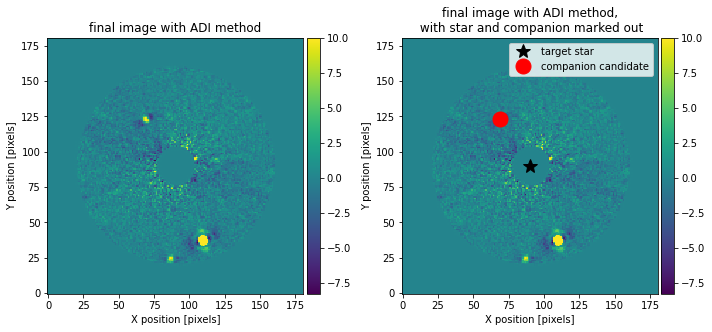

In [8]:
# Q3 answer here

# Performing a regular ADI algorithm
# defining the outer radius of the annular mask
out_rad = 70
# creating an annular mask
m = r_theta(im[0],im_cent,im_cent)[0]
r_mask = m.copy()
m[(m>out_rad)] = 0
m[(m<im_rad)] = 0
m[(m>=im_rad)*(m<=out_rad)] = 1
m = m.astype(int)

# swap axes
im_swap = np.swapaxes(im,0,2)
im_swap = np.swapaxes(im_swap,0,1)
A = im_swap[m==1]

# subtract the median annulus off of the individual annulus
Amedsub = A - np.median(A,axis=1)[:,np.newaxis]
# put annuli back to empty image cube
im_empty = np.zeros_like(im_swap)
im_empty[m==1] = Amedsub
# swap axes to original setting
im_back = np.swapaxes(im_empty,0,1)
im_back = np.swapaxes(im_back,0,2)
# derotate the image cube
outdim = 181,181
out_cent = 90
im_rot = derot_cube(im_back,rot,outdim,(out_cent,out_cent))
ADImed = np.median(im_rot,axis=0)

ADImed_mask = ADImed.copy()
ADImed_mask[(r_mask>=40)+(r_mask<=30)] = np.nan 
indmax = np.unravel_index(np.nanargmax(ADImed_mask), ADImed.shape)
comp_y,comp_x = indmax

print("The companion is at: (x,y) = ({},{})".format(comp_x,comp_y))

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1,2, figsize=(10,10))

im1 = ax[0].imshow(ADImed[:im.shape[1],:im.shape[1]],vmax=10)
ax[0].set_xlabel('X position [pixels]')
ax[0].set_ylabel('Y position [pixels]')
ax[0].set_title('final image with ADI method')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[1].imshow(ADImed[:im.shape[1],:im.shape[1]],vmax=10)
ax[1].plot(out_cent,out_cent,marker='*',ls='none',markersize=15,color='k',label='target star')
ax[1].plot(comp_x,comp_y,marker='o',ls='none',markersize=15,color='r',label='companion candidate')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')
ax[1].set_xlabel('X position [pixels]')
ax[1].set_ylabel('Y position [pixels]')
ax[1].set_title('final image with ADI method,\n with star and companion marked out')
ax[1].legend()

fig.tight_layout()
plt.show()


## 2. PCA

Shape of U:       (14764, 64)
Shape of s:       (64,)
Shape of V:       (64, 64)
The fraction of elements return 'True' is:  1.0
The companion is at: (70,124)


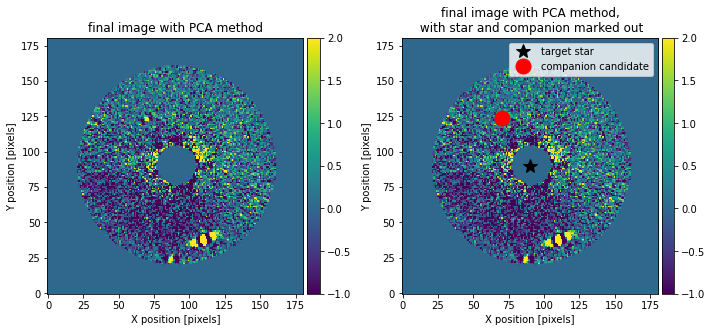

In [9]:
# Q3 answer here

# Performing a PCA algorithm
# defining the outer radius of the annular mask
out_rad = 70
# creating an annular mask
m = r_theta(im[0],im_cent,im_cent)[0]
r_mask = m.copy()
m[(m>out_rad)] = 0
m[(m<im_rad)] = 0
m[(m>=im_rad)*(m<=out_rad)] = 1
m = m.astype(int)

# swap axes
im_swap = np.swapaxes(im,0,2)
im_swap = np.swapaxes(im_swap,0,1)
A = im_swap[m==1]

# subtract the median annulus off of the individual annulus
Amedsub = A - np.median(A,axis=1)[:,np.newaxis]

mean_flux = np.mean(Amedsub,axis=0)
Ain = Amedsub - mean_flux[np.newaxis,:]
U, s, V = np.linalg.svd(Ain, full_matrices=False)
print("Shape of U:       {}".format(U.shape))
print("Shape of s:       {}".format(s.shape))
print("Shape of V:       {}".format(V.shape))

S = np.diag(s)

Aclose = np.dot(np.dot(U,S),V)
print("The fraction of elements return 'True' is: ",len(np.isclose(Aclose,Ain))/len(Ain))
k=5

Uk = U[:,:k]
sk = s[:k]
Vk = V[:k,:]

transformed = np.dot(Vk, Ain.T)
reconstructed = np.dot(transformed.T, Vk)
residuals = Ain - reconstructed
resid = np.zeros_like(im_swap)
resid[m==1] = residuals

resid = np.swapaxes(resid,1,2)
resid = np.swapaxes(resid,0,1)
resid_rot = derot_cube(resid,rot,outdim,(out_cent,out_cent))
PCAmed = np.median(resid_rot,axis=0)

PCAmed_mask = PCAmed.copy()
PCAmed_mask[(r_mask>=40)+(r_mask<=30)] = np.nan 
indmax = np.unravel_index(np.nanargmax(PCAmed_mask), PCAmed.shape)
#indmax = np.unravel_index(PCAmed.argmax(), PCAmed.shape)
comp_y1,comp_x1 = indmax
print("The companion is at: ({},{})".format(comp_x1,comp_y1))

from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1,2, figsize=(10,10))

im1 = ax[0].imshow(PCAmed,vmin=-1,vmax=2)
ax[0].set_xlabel('X position [pixels]')
ax[0].set_ylabel('Y position [pixels]')
ax[0].set_title('final image with PCA method')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

im2 = ax[1].imshow(PCAmed,vmin=-1,vmax=2)
ax[1].plot(out_cent,out_cent,marker='*',ls='none',markersize=15,color='k',label='target star')
ax[1].plot(comp_x1,comp_y1,marker='o',ls='none',markersize=15,color='r',label='companion candidate')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')
ax[1].set_xlabel('X position [pixels]')
ax[1].set_ylabel('Y position [pixels]')
ax[1].set_title('final image with PCA method,\n with star and companion marked out')
ax[1].legend()

fig.tight_layout()
plt.show()


Both algorithms find the position of the companion at the same position: (x,y) = (69,123) $\pm 1$. It appears the first method with regular ADI provide a better result with less noise in the backround, so here and hereafter I will stick to method 2.

---
<span style="  font-size:2em; color: SteelBlue;">Question 4</span> <span style="  font-size:1em; color: SteelBlue;">
(1 point): </span>

1. **Determine the separation in pixels between the candidate companion you identified in Q3 and the star to an accuracy of 1 pixel.** 
1. **Print out this distance using a formatted print statement.** 
1. **Display an image of the candidate companion centered in a square box with side of 20 pixels to show you have identified the candidate companion.**

---

The separation in pixels between the candidate companion and the star is: 39 pixel.


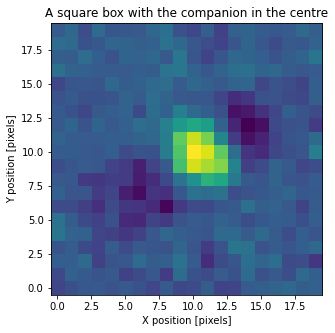

In [10]:
# Q4 answer here
sep = int(np.sqrt((im_cent-comp_x)**2+(im_cent-comp_y)**2))
print("The separation in pixels between the candidate companion and the star is: {} pixel.".format(sep))
plt.figure(figsize=(5,5))
box_half = int(20/2)
plt.imshow(ADImed[comp_y-box_half:comp_y+box_half,comp_x-box_half:comp_x+box_half])
plt.xlabel('X position [pixels]')
plt.ylabel('Y position [pixels]')
plt.title('A square box with the companion in the centre')
plt.show()


---
<span style="  font-size:2em; color: SteelBlue;">Question 5</span> <span style="  font-size:1em; color: SteelBlue;">
(1 point): </span>

1. **Assuming a pixel scale of $12.25\pm 0.05$ milliarcsec per pixel, determine the angular separation of the companion from the star in arcseconds, and the position angle of the companion in degrees, and estimate the errors on both these quantities. Print out these results using a formatted print statement.** 


<div class="alert alert-block alert-info">
<b>Remember:</b> you have an error of 0.5 pixel for your estimated position of the planet rounded to the nearest pixel. </div>


Let $f =$ separation in arcsecond, $a=$ separation in pixels, $b=$ pixel scale, $g=$ position angle so 
$$f = ab$$ and
\begin{aligned}
\left(\frac{\sigma _f}{f}\right)^2 = \left(\frac{\sigma _a}{a}\right)^2+\left(\frac{\sigma _b}{b}\right)^2\\
\implies\sigma_f = f\sqrt{\left(\frac{\sigma _a}{a}\right)^2+\left(\frac{\sigma _b}{b}\right)^2}
\end{aligned}

$$b = \sqrt{x^2+y^2}$$
$$\sigma_b = \sigma_x = \sigma_y = 0.5 \ pixel$$

$$g = tan^{-1}\left(-\frac{x-x_s}{y-y_s}\right)\cdot \frac{180}{\pi}+180$$ and
\begin{aligned}
\sigma_g^2 &= \Bigg|\frac{\partial g}{\partial x}\Bigg|^2\sigma_x^2+\Bigg|\frac{\partial g}{\partial y}\Bigg|^2\sigma_y^2\\
\implies \sigma_g &=\sqrt{\left(\frac{180}{\pi}\cdot\frac{1}{1+A^2}\frac{A}{y-y_s}\right)^2\sigma_x^2+\left(\frac{180}{\pi}\cdot\frac{1}{1+A^2}\frac{1}{y-y_s}\right)^2\sigma_y^2}\\
&=\frac{180}{\pi}\frac{1}{\sqrt{A^2+1}}\frac{1}{|y-y_s|}\sigma_x\\
\end{aligned}
where $A=-\frac{x-x_s}{y-y_s}$

In [11]:
# Q5 answer here
pscale = 12.25e-3
dpscale = .05e-3
dsep = .5 # an error of 0.5 pixel
sep_arcsec = sep*pscale
dsep_arcsec = np.sqrt((dsep/sep)**2+(dpscale/pscale)**2)*sep_arcsec
A = -(comp_x-im_cent)/(comp_y-im_cent)
pos_ang = np.arctan(A)/np.pi*180+180
dpos_ang = 180/np.pi*np.sqrt(1/(A**2+1))/np.abs(comp_y-im_cent)*dsep
print("The the angular separation of the companion from the star is {:.3f} +/- {:.3f} arcseconds.".format(sep_arcsec,dsep_arcsec))
print("The position angle is: {:.1f} +/- {:.1f} degree.".format(pos_ang,dpos_ang))

The the angular separation of the companion from the star is 0.478 +/- 0.006 arcseconds.
The position angle is: 212.5 +/- 0.7 degree.



---
<span style="  font-size:2em; color: SteelBlue;">Question 6</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>

1. **Measure the flux of the candidate companion using an aperture that is 100 milliarcseconds in diameter and centered on the candidate companion. Print using a formatted print statement.** 


<div class="alert alert-block alert-info">
<b>Remember:</b> to estimate the sky background using a similar sized aperture at the same angular distance from the star but close to the location of the candidate companion. </div>


2. **Print the r.m.s. per pixel in the sky background aperture, and print the summed candidate companion flux corrected for the sky background level.** 

---


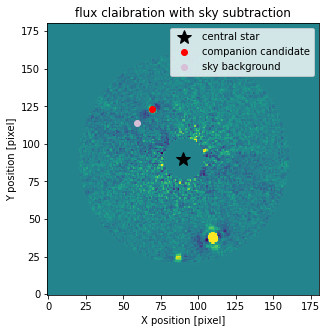

The flux inside the aperture that is 100 milliarcseconds in diameter 
 and centered on the candidate companion is  136.21.
The flux inside the aperture that is 100 milliarcseconds in diameter 
 and centered on the sky background is  -38.02, with an r.m.s. of 0.75 per pixel.
The calibrated flux inside the aperture that is 100 milliarcseconds in diameter is  174.23.


In [12]:
# Q6 answer here
aper = 100e-3 # arcsec
aper_px = aper/pscale
r_px = aper_px/2
r_mask = r_theta(ADImed,comp_x,comp_y)[0]

offset = 20 # degree 
ang = pos_ang + offset
sky_x = im_cent - sep*np.sin((ang-180)/180*np.pi)
sky_y = im_cent + sep*np.cos((ang-180)/180*np.pi)
r_mask_sky = r_theta(ADImed,sky_x,sky_y)[0]

plt.figure(figsize=(5,5))
plt.imshow(ADImed,vmax=10)
plt.plot(im_cent,im_cent,ls='none',marker='*',markersize=15,color='k',label='central star')
plt.plot(comp_x,comp_y,ls='none',marker='o',color='r',label='companion candidate')
plt.plot(sky_x,sky_y,ls='none',marker='o',color='thistle',label='sky background')
plt.xlabel('X position [pixel]')
plt.ylabel('Y position [pixel]')
plt.title('flux claibration with sky subtraction')
plt.legend()
plt.show()
flux_comp = np.sum(ADImed[r_mask<=r_px])
flux_bg = np.sum(ADImed[r_mask_sky<=r_px])
flux_std_sky = np.std(ADImed[r_mask_sky<=r_px])
flux_comp_corrected = flux_comp - flux_bg
print("The flux inside the aperture that is 100 milliarcseconds in diameter \n and centered on the candidate companion is  {:.2f}.".format(flux_comp))
print("The flux inside the aperture that is 100 milliarcseconds in diameter \n and centered on the sky background is  {:.2f}, with an r.m.s. of {:.2f} per pixel.".format(flux_bg,flux_std_sky))
print("The calibrated flux inside the aperture that is 100 milliarcseconds in diameter is  {:.2f}.".format(flux_comp_corrected))





***

<span style="  font-size:2em; color: SteelBlue;">Last, but important question</span> 

---

### How long did this Exam take?
Please enter the number of hours you spent on this exam below:

Number of hours taken for this practicum ~ 6 hours.
